# Time-Series anomaly detection of home time using seasonal arima technique

Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting. Although the method can handle data with a trend, it does not support time series with a seasonal component. An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.

Terminologies in ARIMA
ARIMA model can be (almost) completely summarized by three numbers:

* p = the number of autoregressive terms
p is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model. ** Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

* d = the number of nonseasonal differences
d is the number of nonseasonal differences needed for stationarity. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

* q = the number of moving-average terms
q is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

These are the three integers (p, d, q) that are used to parametrize ARIMA models. Hence, this is called an “ARIMA (p, d, q)” model.

Usually we need to manually tune the arima model by changing these three numbers, however, it can be optimise automatically using the auto arima function which test out every permutation for best fit of data and it is employed here. 

# Data used
As Arima model needs more data point (100 minimum, we only have 46 days) than what we have, I have combined 2 patient data set together which are similar in terms of the pattern of time stayed at home in order to test out the model. Since the code uses auto arima to tune the parameters, it would work with any other data set in the future, i just need more data so as to build the model. 


In [1]:
#Installing specific version of plotly to avoid Invalid property for color error in recent version which needs change in layout

import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
time_series_df=pd.read_csv('C:/Users/Dell/Nextcloud/IMH/Ye sheng/R analystics/Beiwe-Analysis-master/Beiwe-Analysis-master/Preprocessing/PreprocessingExample/GpsRaw/Mobfeat fake/MLdataset_sarima.csv')
time_series_df.head()

,load_date,Hometime,DistTravelled,RoG,MaxDiam,MaxHomeDist,SigLocsVisited,AvgFlightLen,StdFlightLen,AvgFlightDur,StdFlightDur,ProbPause,SigLocEntropy,MinsMissing,CircdnRtn,WkEndDayRtn
0,6/8/2019,12.438889,9.921317,2.152954,4.459034,4.413240,2,254.392735,564.871910,234.102564,732.891598,0.894329,0.680251,1435.000000,0.567676,0.622199
1,7/8/2019,13.511111,13.904700,2.099748,4.783096,4.413328,2,187.901350,480.625483,98.378378,333.507828,0.915741,0.664787,1438.000000,0.558877,0.609069
2,8/8/2019,10.660284,24.905342,2.223066,9.893457,5.329518,2,251.569111,612.291170,93.838384,307.775783,0.892477,0.683120,1438.500000,0.498318,0.552871
3,9/8/2019,5.220271,20.556856,1.764201,4.580351,4.433009,4,102.784281,274.650668,90.350000,614.136954,0.790856,0.693112,1440.000000,0.252976,0.276085
4,13/8/2019,0.100000,4.620061,0.219237,0.133975,4.418520,1,577.507624,1575.805351,3872.500000,10580.921850,0.643855,0.000000,1435.833333,0.267081,0.335609


In [2]:
#sorting the data set base on dates
time_series_df.load_date = pd.to_datetime(time_series_df.load_date, format='%d/%m/%Y')
time_series_df = time_series_df.sort_values(by="load_date")
time_series_df = time_series_df.reset_index(drop=True)
time_series_df

,load_date,Hometime,DistTravelled,RoG,MaxDiam,MaxHomeDist,SigLocsVisited,AvgFlightLen,StdFlightLen,AvgFlightDur,StdFlightDur,ProbPause,SigLocEntropy,MinsMissing,CircdnRtn,WkEndDayRtn
0,2019-08-06,12.438889,9.921317,2.152954,4.459034,4.413240,2,254.392735,564.871910,234.102564,732.891598,0.894329,0.680251,1435.000000,0.567676,0.622199
1,2019-08-07,13.511111,13.904700,2.099748,4.783096,4.413328,2,187.901350,480.625483,98.378378,333.507828,0.915741,0.664787,1438.000000,0.558877,0.609069
2,2019-08-08,10.660284,24.905342,2.223066,9.893457,5.329518,2,251.569111,612.291170,93.838384,307.775783,0.892477,0.683120,1438.500000,0.498318,0.552871
3,2019-08-09,5.220271,20.556856,1.764201,4.580351,4.433009,4,102.784281,274.650668,90.350000,614.136954,0.790856,0.693112,1440.000000,0.252976,0.276085
4,2019-08-13,0.100000,4.620061,0.219237,0.133975,4.418520,1,577.507624,1575.805351,3872.500000,10580.921850,0.643855,0.000000,1435.833333,0.267081,0.335609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2019-11-28,14.291667,13.145748,0.510712,2.929366,1.492374,3,62.302122,132.733713,92.606635,282.860106,0.773843,0.615895,1430.666667,0.489634,0.501111
112,2019-11-29,19.216667,3.856089,0.270534,1.427172,1.047426,2,34.739540,95.660635,152.882883,513.461316,0.803588,0.021405,1434.166667,0.489837,0.558333
113,2019-11-30,19.255556,2.289207,0.299759,0.996720,0.896485,2,67.329628,119.376165,189.705882,331.959155,0.925347,0.391971,1436.166667,0.418902,0.520833
114,2019-12-01,11.875000,15.075798,1.388654,4.500886,4.487762,2,56.043859,84.780677,60.334572,194.599377,0.812153,0.619310,1432.000000,0.521748,0.578333


In [3]:
actual_vals = time_series_df.Hometime.values
actual_vals
actual_log = actual_vals
actual_vals

array([12.43888889, 13.51111111, 10.66028417,  5.22027139,  0.1       ,
        5.48971583,  8.28806194,  4.31471583, 23.72777778,  9.71944444,
       10.45833333, 10.19083972,  3.21471583,  8.30472861,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  3.0313825 , 11.74722222,
        9.75      , 13.15833333,  9.025     , 11.78055556, 12.19722222,
       20.61306194,  6.04249361,  8.80833333,  6.5       ,  9.80555556,
        9.27222222, 13.21306194, 23.0563825 ,  3.77695083,  4.11471583,
       24.        , 10.17222222,  7.06388889, 21.225     , 12.74722222,
        1.74083972, 11.23333333,  4.22777778,  2.73611111,  7.62062806,
       14.36270528,  4.22777778,  1.475     , 10.95951694,  8.26826083,
        4.48333333,  0.77340583,  1.16826083, 18.74444444, 12.74166667,
        6.24722222,  9.98888889, 10.79722222,  5.68888889,  5.73888889,
        1.49562806,  5.96548306,  5.61666667,  9.45396139,  0.52

In [4]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
train, test = actual_vals[0:-80], actual_vals[-80:]
train_log, test_log = np.log10(train), np.log10(test)
my_order = (1, 1, 1)
my_seasonal_order = (0, 1, 1, 7)
# my_order = (0, 0, 0)
# my_seasonal_order = (0, 1, 1, 7)

# Building the arima model

Here I start building the model base on the seasonal variables I have declared above. I have a total of about 115 days worth of data. I split the data into train and test sets. The trainign set contains 80 days worth of hometime data and the test set contains 35 days of test. 

After training the model we get the model to predict the next 35 days of data and comparing it to our test set. Here we see in the graph that the model prediction seem to do a pretty okay job at predicting however let's try out the auto arima

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.996126, expected=1.121003
predicted=1.600357, expected=1.362791
predicted=1.226044, expected=0.577141
predicted=0.580639, expected=0.614340


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.574611, expected=1.380211
predicted=1.446949, expected=1.007416
predicted=0.919109, expected=0.849044
predicted=1.000354, expected=1.326848
predicted=1.670412, expected=1.105416
predicted=0.714111, expected=0.240759
predicted=0.383841, expected=1.050509
predicted=1.482135, expected=0.626112
predicted=0.597704, expected=0.437134
predicted=0.429768, expected=0.881991
predicted=1.226237, expected=1.157236
predicted=1.237688, expected=0.626112
predicted=0.036925, expected=0.168792
predicted=0.721219, expected=1.039791
predicted=0.993444, expected=0.917414
predicted=0.757582, expected=0.651601
predicted=0.896111, expected=-0.111593
predicted=0.380919, expected=0.067540
predicted=-0.016179, expected=1.272873
predicted=0.691325, expected=1.105226
predicted=1.559874, expected=0.795687
predicted=0.873435, expected=0.999517
predicted=0.867079, expected=1.033312
predicted=0.762466, expected=0.755027
predicted=0.981830, expected=0.758828


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=1.146668, expected=0.174824
predicted=0.059384, expected=0.775646
predicted=0.743385, expected=0.749479
predicted=0.874008, expected=0.975614
predicted=0.899646, expected=-0.283130
predicted=-0.258680, expected=-0.312208
predicted=0.012620, expected=0.546474
predicted=0.571293, expected=1.087009
predicted=0.936011, expected=0.600247
predicted=0.601417, expected=0.524117
predicted=0.701096, expected=0.051767
predicted=0.005960, expected=1.105416
predicted=0.567427, expected=-0.184448
predicted=0.295630, expected=0.764378
predicted=0.819634, expected=1.153343
predicted=0.784972, expected=0.889924
predicted=0.781008, expected=1.122307
predicted=1.105895, expected=1.086854
predicted=1.020516, expected=1.000000
predicted=0.618990, expected=0.787857
predicted=1.081579, expected=1.320791
predicted=1.418407, expected=1.165163
predicted=1.015060, expected=1.075261
predicted=1.061562, expected=1.097103
predicted=1.197511, expected=1.102662
predicted=1.094465, expected=1.025988
predicte

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.959065, expected=-1.000000
predicted=-1.280630, expected=-1.000000
predicted=-0.905695, expected=-1.000000
predicted=-0.824505, expected=-1.000000
predicted=-1.142372, expected=0.811460
predicted=0.214451, expected=1.013188


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.889764, expected=1.118467
predicted=0.924173, expected=1.155083
predicted=0.738912, expected=1.283678
predicted=1.271275, expected=1.284556
predicted=1.397683, expected=1.074634
predicted=1.094078, expected=0.881577


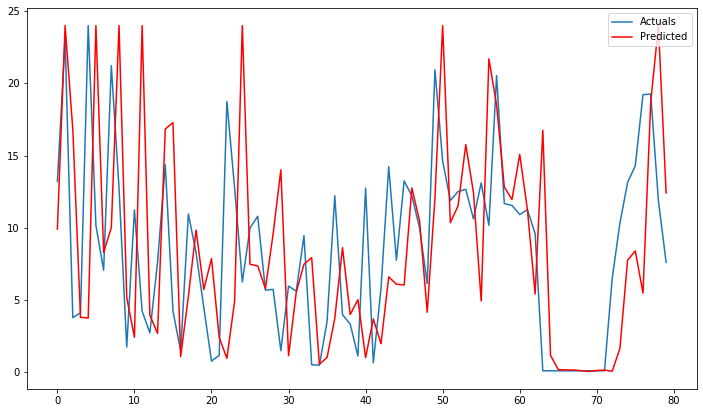

In [5]:
# this will be testing out a manual tuning of the model where I manually select P, Q and R value
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)
# plot

#Adjust the predicted to have a maximum value of 24hours only
index = 0
for i in predictions:
    if i > 24:
        i = 24
    predictions[index] = i
    index = index + 1
#plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

# Using auto arima to run through all permutation of of seasonal order for best fit in our data

Here I employ the auto arima function for the computer to test every permutation and select the best tuning variables

In [6]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train_log, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=74.132, BIC=80.793, Fit time=0.144 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=76.524, BIC=79.189, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=73.483, BIC=78.811, Fit time=0.043 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=72.599, BIC=77.928, Fit time=0.061 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=81.325, BIC=87.986, Fit time=0.263 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=78.221, BIC=82.218, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=71.696, BIC=75.693, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=80.088, BIC=85.416, Fit time=

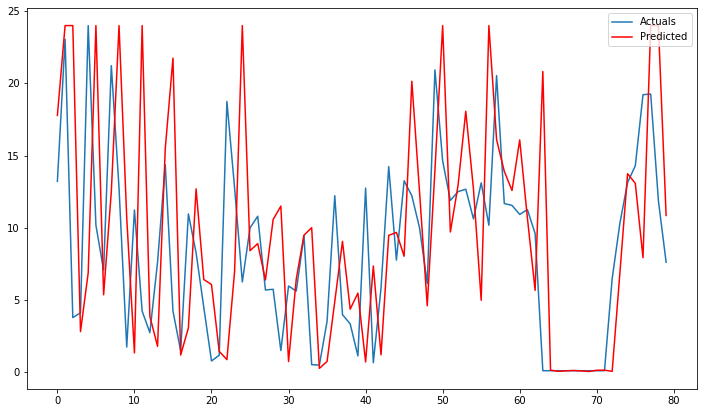

In [7]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
train, test = actual_vals[0:-80], actual_vals[-80:]
train_log, test_log = np.log10(train), np.log10(test)
# split data into train and test-sets
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    #model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    stepwise_model.fit(history)
    output = stepwise_model.predict(n_periods=1)
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)

#Adjust the predicted to have a maximum value of 24hours only
index = 0
for i in predictions:
    if i > 24:
        i = 24
    predictions[index] = i
    index = index + 1
#plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [8]:
predicted_df=pd.DataFrame()
predicted_df['load_date']=time_series_df['load_date'][-80:]
predicted_df['actuals']=test
predicted_df['predicted']=predictions
predicted_df.reset_index(inplace=True)
del predicted_df['index']
predicted_df.head()


,load_date,actuals,predicted
0,2019-09-14,13.213062,17.777346
1,2019-09-15,23.056383,24.000000
2,2019-09-16,3.776951,24.000000
3,2019-09-17,4.114716,2.807218
4,2019-09-18,24.000000,6.881010


In [9]:
import numpy as np
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                               range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE",
              7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='load_date', ascending=False)
    df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y-%m-%d")
    return df

# Steps I do to detect anomalies:
1. Compute the error term(actual- predicted).
2. Compute the rolling mean and rolling standard deviation(window is a week).
3. Classify data with an error of 1.5,1.75 and 2 standard deviations as limits for low,medium and high anomalies. (5% of data point would be identified anomalies based on this property)
I have used lambda function for classifying anomalies based error and standard deviation rather than having separate loops and function for it.

In [15]:
def plot_anomaly(df,metric_name):
    #error = pd.DataFrame(Order_results.error.values)
    #df = df.sort_values(by='load_date', ascending=False)
    #df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y%m%d")
    dates = df.load_date
    #meanval = error.rolling(window=window).mean()
    #deviation = error.rolling(window=window).std()
    #res = error
#upper_bond=meanval + (2 * deviation)
    #lower_bond=meanval - (2 * deviation)
#anomalies = pd.DataFrame(index=res.index, columns=res.columns)
    #anomalies[res < lower_bond] = res[res < lower_bond]
    #anomalies[res > upper_bond] = res[res > upper_bond]
    bool_array = (abs(df['anomaly_points']) > 0)
#And a subplot of the Actual Values.
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
#Order_results['meanval']=meanval
    #Order_results['deviation']=deviation
    color_map= {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "orange", 3: "red"}
    table = go.Table(
    domain=dict(x=[0, 1],
                y=[0, 0.3]),
    columnwidth=[1, 2 ],
    #columnorder=[0, 1, 2,],
    header = dict(height = 20,
                  values = [['<b>Date</b>'],['<b>Actual Values </b>'],
                            ['<b>Predicted</b>'], ['<b>% Difference</b>'],['<b>Severity (0-3)</b>']],
                 font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                  fill = dict(color='#d562be')),
    cells = dict(values = [df.round(3)[k].tolist() for k in ['load_date', 'actuals', 'predicted',
                                                               'percentage_change','color']],
                 line = dict(color='#506784'),
                 align = ['center'] * 5,
                 font = dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                 #format = [None] + [",.4f"] + [',.4f'],
#suffix=[None] * 4,
                 suffix=[None] + [''] + [''] + ['%'] + [''],
                 height = 27,
                 #fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']))
                 fill=dict(color=  # ['rgb(245,245,245)',#unique color for the first column
                      [df['color'].map(color_map)],
                      )
    ))
#df['ano'] = np.where(df['color']==3, df['error'], np.nan)
    anomalies = go.Scatter(name="Anomaly",
                       x=dates,
                       xaxis='x1',
                       yaxis='y1',
                       y=df['anomaly_points'],
                       mode='markers',
                       marker = dict(color ='red',
                      size = 11,line = dict(
                                         color = "red",
                                         width = 2)))
    upper_bound = go.Scatter(hoverinfo="skip",
                         x=dates,
                         showlegend =False,
                         xaxis='x1',
                         yaxis='y1',
                         y=df['3s'],
                         marker=dict(color="#444"),
                         line=dict(
                             color=('rgb(23, 96, 167)'),
                             width=2,
                             dash='dash'),
                         fillcolor='rgba(68, 68, 68, 0.3)',
                         fill='tonexty')
    lower_bound = go.Scatter(name='Confidence Interval',
                          x=dates,
                         xaxis='x1',
                         yaxis='y1',
                          y=df['-3s'],
                          marker=dict(color="#444"),
                          line=dict(
                              color=('rgb(23, 96, 167)'),
                              width=2,
                              dash='dash'),
                          fillcolor='rgba(68, 68, 68, 0.3)',
                          fill='tonexty')
    Actuals = go.Scatter(name= 'Actuals',
                     x= dates,
                     y= df['actuals'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))
    Predicted = go.Scatter(name= 'Predicted',
                     x= dates,
                     y= df['predicted'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="orange"))
# create plot for error...
    Error = go.Scatter(name="Error",
                   x=dates, y=df['error'],
                   xaxis='x1',
                   yaxis='y1',
                   mode='line',
                   marker=dict(size=12,
                               line=dict(width=1),
                               color="red"),
                   text="Error")
    anomalies_map = go.Scatter(name = "anomaly actual",
                                   showlegend=False,
                                   x=dates,
                                   y=anomaly_points,
                                   mode='markers',
                                   xaxis='x2',
                                   yaxis='y2',
                                    marker = dict(color ="red",
                                  size = 11,
                                 line = dict(
                                     color = "red",
                                     width = 2)))
    Mvingavrg = go.Scatter(name="Moving Average",
                           x=dates,
                           y=df['meanval'],
                           mode='line',
                           xaxis='x1',
                           yaxis='y1',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color="green"),
                           text="Moving average")
    axis=dict(
        showline=True,
        zeroline=False,
        showgrid=True,
        mirror=True,
        ticklen=4,
        gridcolor='#ffffff',
        tickfont=dict(size=10))
    layout = dict(
        width=1000,
        height=865,
        autosize=False,
        title= metric_name,
        margin = dict(t=75),
        showlegend=True,
        xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
        xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2', showticklabels=True)),
        yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20 + 0.09, 1], anchor='x1', hoverformat='.2f')),
        yaxis2=dict(axis, **dict(domain=[0.21 + 0.12, 2 * 0.31 + 0.02], anchor='x2', hoverformat='.2f')))
    fig = go.Figure(data = [table,anomalies,anomalies_map,
                            upper_bound,lower_bound,Actuals,Predicted,
                            Mvingavrg,Error], layout = layout)
    iplot(fig)
    pyplot.show()

classify_df=detect_classify_anomalies(predicted_df,7)
classify_df.reset_index(inplace=True)
del classify_df['index']
plot_anomaly(classify_df,"Time Spent At Home")

USING LSTM METHOD

In [11]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
#disable gpu


# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]
#### LSTM
supervised = timeseries_to_supervised(actual_log, 1)
supervised_values = supervised.values
# split data into train and test-sets
train_lstm, test_lstm = supervised_values[0:-70], supervised_values[-70:]
# transform the scale of the data
scaler, train_scaled_lstm, test_scaled_lstm = scale(train_lstm, test_lstm)
# fit the model                 batch,Epoch,Neurons
lstm_model = fit_lstm(train_scaled_lstm, 1, 850 , 3)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled_lstm[:, 0].reshape(len(train_scaled_lstm), 1, 1)
#lstm_model.predict(train_reshaped, batch_size=1)

Using TensorFlow backend.





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










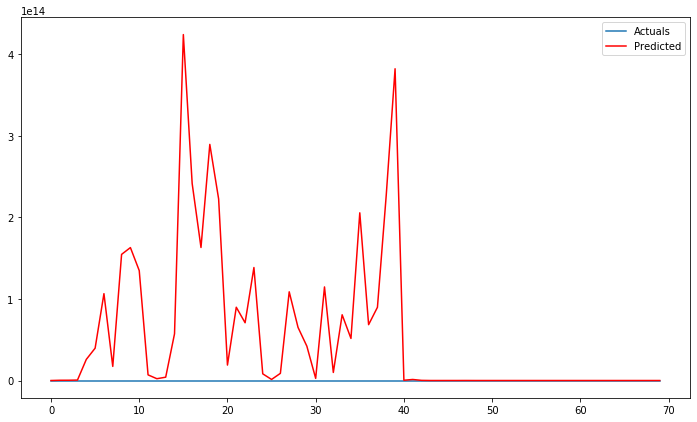

In [12]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled_lstm)):
#make one-step forecast
    X, y = test_scaled_lstm[i, 0:-1], test_scaled_lstm[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    #yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(10**yhat)
    expected = actual_log[len(train_lstm) + i ]
# line plot of observed vs predicted
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(actual_vals[-70:],label='Actuals')
pyplot.plot(predictions, color = "red",label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [13]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [14]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
print(tf.__version__)
print(keras.__version__)
print(device_lib.list_local_devices())

1.15.0
2.1.2
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11697639686677718496
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3144653209
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8144147679330751525
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
